In [1]:
"""
Statistical tests for determining the importance
of self loops in terms of accuracy
"""
import pandas as pd
import numpy as np
from scipy.stats import ttest_rel

df = pd.read_csv('outputs/csvs/base_gender_self_loops.csv')
cols = ['Train/Test','Metric', 'Feature', 't_statstic', 'p_value']
l1 = []

In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))


In [3]:
df.head()

Unnamed: 0 Classifier  Target  Choice    Edge Feature Selection  \
0           0        SVC  Gender  random  t_test          baseline   
1           1        SVC  Gender  random  t_test          baseline   
2           2        SVC  Gender  random  t_test          baseline   
3           3        SVC  Gender  random  t_test          baseline   
4           4        SVC  Gender  random  t_test          baseline   

  Type of feature  Percentage       Refit Metric  Num_features  \
0       mean_strl           2  balanced_accuracy            72   
1       mean_strl           2  balanced_accuracy            70   
2       mean_strl           5  balanced_accuracy           179   
3       mean_strl           5  balanced_accuracy           175   
4       mean_strl          10  balanced_accuracy           357   

   train_balanced_accuracy  train_accuracy  train_f1_weighted  \
0                   82.852          84.397             87.356   
1                   82.852          84.397             87.356   
2                   81.045          82.270             85.380   
3                   84.057          85.816             88.636   
4                   99.138          99.291             99.401   

   train_roc_auc_ovr_weighted  test_balanced_accuracy  test_accuracy  \
0                      90.798                  70.168         69.355   
1                      89.074                  68.697         67.742   
2                      86.757                  61.555         61.290   
3                      92.231                  66.912         66.129   
4                     100.000                  65.126         64.516   

   test_f1_weighted  test_roc_auc_ovr_weighted  Self_loops  ROI_strl_thresh  
0            69.841                     76.366        True                0  
1            68.750                     73.634       False                0  
2            60.000                     73.739        True                0  
3            66.667                     75.210       False                0  
4            64.516                     75.840        True                0

In [4]:
for edge in ['mean_FA', 'mean_strl', 'num_streamlines']:
    sliced = df[df['Type of feature'] == edge]
    for type in ['train', 'test']:
        for metric in [f'{type}_roc_auc_ovr_weighted', f'{type}_balanced_accuracy']:
            s1 = sliced[sliced['Self_loops']== True][metric]
            s2 = sliced[sliced['Self_loops']==False][metric]
            stat, pval =  ttest_rel(s1,s2)
            l1.append([type ,metric.split('_',1)[1], edge, stat, pval])

In [5]:

def corresp_label_file(file):
    f = open('/home/skapoor/Thesis/Notes/HCP_data/labels/' + file)
    dat = f.read()
    if file == 'FreeSurferColorLUT.txt':
        dat = [x.split(' ')[::2] for x in dat.split('\n')[1:-1]]
        dat = [x for x in dat if len(x) >= 3 and x[0] != '#']
        dict_data = {int(x[0]): x[1] for x in dat}
        """for x in np.unique(labels).astype(int):
            for y in dat: 
                if y[0]!=[''] and y[0]!='#':
                    #print(str(x), y)
                    if str(x) == y[0]: 
                        for a in y: 
                            if 'white-matter' in a.lower():
                                print (y)
                            if 'corpus' in a.lower(): 
                                print (y)
                            if 'cc' in a.lower(): 
                                print (y)"""
    elif file == 'fs_default.txt':
        dat = [re.sub(' +', ' ', x).split(' ') for x in dat.split('\n')[2:-2]]
        dat = [x for x in dat if len(x) >= 3 and int(x[0])]
        dict_data = {int(x[0]): x[2] for x in dat}

    return dict_data


In [6]:
l1 = pd.DataFrame(l1, columns=cols)
l1.head()

Train/Test                Metric    Feature  t_statstic   p_value
0      train  roc_auc_ovr_weighted    mean_FA   -0.355836  0.724539
1      train     balanced_accuracy    mean_FA   -0.699057  0.490086
2       test  roc_auc_ovr_weighted    mean_FA    0.490515  0.627461
3       test     balanced_accuracy    mean_FA    0.396139  0.694902
4      train  roc_auc_ovr_weighted  mean_strl    1.515432  0.140488

In [7]:
l1.to_csv('outputs/self_loops_test.csv')

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
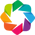

In [8]:
import pandas as pd
import holoviews as hv
from holoviews import opts, dim
from bokeh.sampledata.les_mis import data
import re
import numpy as np
import pandas as pd
import holoviews as hv
import networkx as nx
from holoviews import opts

hv.extension('bokeh')
hv.output(size=500)

In [9]:
import copy
from itertools import product
from classification_refined import classify
from processing import *
from readfiles import *
from decision import filter_summary
from subgraphclass import make_solver_summary
from sklearn.model_selection import train_test_split

In [10]:
num = 84  # number of nodes in the graph
tri = int(num * (num + 1) * 0.5)  # we want only the upper diagonal parts since everything below diagonal is 0
big5 = ['NEOFAC_A', 'NEOFAC_O', 'NEOFAC_C', 'NEOFAC_N', 'NEOFAC_E']
edge_names = ['mean_FA', 'mean_strl', 'num_streamlines']
labels= ['Agreeableness', 'Openness', 'Conscientiousness', 'Neuroticism',
        'Extraversion']
mapping = {k: v for k, v in zip(labels, big5)}
mat = np.triu_indices(84)
mews = '/home/skapoor/Thesis/gmwcs-solver'
metrics = ['balanced_accuracy', 'accuracy', 'f1_weighted', 'roc_auc_ovr_weighted']
edges = [ 'pearson']
# note: right now the matrix whole is not scaled, for computing the fscores and correlation coeff it has to be so.
y_train = computed_subjects()
X_train = generate_combined_matrix(tri, list(y_train.index))  # need to check indices till here then convert to numpy array

#labels = ['Gender']
#mapping = {'Gender': 'Gender'}
y_test = test_subjects()
X_test = generate_test_data(tri, y_test.index)
#X_train = pd.concat([X_train, X_test],axis=0)
#y_train = pd.concat([y_train, y_test], axis=0)
num_strls = X_train.iloc[:, 2 * tri:]

In [1]:
'''
Visualizing the Gender graph outputs
'''
from graphclass import BrainGraph
from paramopt import graph_options
from metrics import diag_flattened_indices

In [12]:
nondiag = list(set(range(3570)).difference(set(diag_flattened_indices(84))))

In [13]:
d1 =corresp_label_file('fs_default.txt')

In [14]:
def find_indices(lin):
    d1 = {}
    mat = np.triu_indices(84)
    for idx in lin: 
        for i in range(len(mat[0])):
            if i == idx:
                d1[idx] = (mat[0][i], mat[1][i])
    return d1

In [15]:
def make_links_nodes(feature_indices, df, thresh, factor):    
    links = []
    mapping = find_indices(feature_indices)    

    for edge, index in zip(mapping, feature_indices):
        if df.iloc[index]//factor> thresh:
            #print(df.iloc[index])
            links.append([mapping[index][0], mapping[index][1], df.iloc[index]//factor])
            

    links = pd.DataFrame.from_records(links, columns=['source', 'target', 'value'])
    links = links.astype(int)
    #print(links.head())
    nodes = list(links['source'].unique())
    #print(links['source'].unique())
    #print('n1 unique',nodes)
    nodes.extend(list(links['target'].unique()))
    #print(links['target'].unique())
    nodes = list(set(nodes))
    #print(nodes)
    d1 = corresp_label_file('fs_default.txt')
    labels = []
    for node in nodes:
        #print(node, d1[node+1])
        labels.append(d1[node+1])
    #print(len(nodes), len(labels))
    nodes = pd.DataFrame(zip( nodes, labels
                             , nodes) , columns=['index', 'name', 'group'])
    nodes = hv.Dataset(nodes, 'index')
    
    return links, nodes

In [16]:
nondiag = list(set(range(3570)).difference(set(diag_flattened_indices(84))))

In [17]:
num_strls.mean(axis=0).describe()

count     3570.000000
mean       253.275710
std       1834.346681
min          0.000000
25%          0.602837
50%          4.918440
75%         43.414894
max      59150.716312
dtype: float64

In [18]:
import matplotlib.pylab as plt
plt.rcParams['figure.dpi'] = 500


In [19]:
links, nodes = make_links_nodes(nondiag, num_strls.mean(axis=0), thresh= 90, factor=10)


chord = hv.Chord((links, nodes)).select(value=(1, None))
chord.opts(
    opts.Chord(cmap='Category20', edge_cmap='Category20', edge_color=dim('target').str(), 
               fontsize=30, fontscale=10, node_size=10, label_text_font_size="12pt", label_text_align ="left",
            label_text_baseline = 20, margin=1, padding=10, xrotation = 90, width=300,
               labels='name', node_color=dim('index').str()))


:Chord   [source,target]   (value)

In [32]:
def make_links_nodes_2(ip, feature_indices, df, thresh = 20):    
    links = []

    indices = feature_indices

    mapping = {}
    for i in range(len(ip.nodes)):
        mapping[list(ip.nodes)[i]] = i

    for edge, index in zip(ip.edges, feature_indices):
            links.append([mapping[edge[0]], mapping[edge[1]], df.iloc[index]])

    links = pd.DataFrame.from_records(links, columns=['source', 'target', 'value'])
    links = links.astype(int)

    nodes = pd.DataFrame(zip(range(len(ip.nodes)), list(ip.node_labels)
                             ,range(len(ip.nodes))), columns=['index', 'name', 'group'])
    nodes = hv.Dataset(nodes, 'index')
    
    return links, nodes

In [33]:

ip = BrainGraph('t_test', 'num_streamlines', 'const', 'Gender', 10, -0.01, 0)
feature_indices = ip.read_from_file(mews, False)
#ip.visualize_graph(mews, False, plotting_options=graph_options('red',10, 'yellow', 2, 1.5),
#                   figs=(10,6))
G = ip

In [34]:
links, nodes = make_links_nodes_2(ip, feature_indices, num_strls.mean(axis=0))

In [35]:
links

source  target  value
0        0       2   2707
1        0       7     90
2        0       9   2143
3        0       8    805
4        0       1    690
5        0       3     65
6        0       4     28
7        0       6    413
8        1       3     55
9        1       8     71
10       1       9   2028
11       1       4   1145
12       1       6    497
13       1       7    288
14       1       2     90
15       1       5   3093
16       2       7     70
17       2       3    477
18       2       8     67
19       2       9    136
20       2       5    140
21       2       4    107
22       3       4   6760
23       3       7   3138
24       3       9    297
25       3       5    123
26       3       8     18
27       4       7    254
28       4       5    207
29       4       9    705
30       4       6     18
31       4       8    188
32       5       7     51
33       5       9     13
34       5       6     55
35       5       8    110
36       6       9    325
37       6       8   1924
38       6       7    544
39       7       9    641
40       7       8    211
41       8       9     87

In [40]:
chord = hv.Chord((links, nodes)).select(value=(1, None))
chord.opts(
    opts.Chord(cmap='Category20', edge_cmap='Category20', edge_color=dim('target').str(), 
               fontsize=30, fontscale=10, node_size=10, label_text_font_size="12pt", label_text_align ="left",
            label_text_baseline = 20, margin=1, padding=10, xrotation = 90, width=250, height=250,
               labels='name', node_color=dim('index').str()))

:Chord   [source,target]   (value)

In [ ]:
y_train = y_train['Gender']
m = y_train[y_train=='M']
f = y_train[y_train=='F']
dfm = num_strls.loc[m.index].median(axis=0)
dff = num_strls.loc[f.index].median(axis=0)

In [ ]:
dfm = dfm.astype(int)
dff = dff.astype(int)

In [ ]:
linkm,nodem = make_links_nodes(ip, feature_indices, dfm)
linkf, nodef = make_links_nodes(ip, feature_indices, dff)

In [ ]:

chordm = hv.Chord((linkm, nodem)).select(value=(1, None))
chordm.opts(
    opts.Chord(cmap='Category20', edge_cmap='Category20', edge_color=dim('source').str(), 
               labels='name', node_color=dim('index').str()))


In [ ]:
chordf = hv.Chord((linkf, nodef)).select(value=(1, None))
chordf.opts(
    opts.Chord(cmap='Category20', edge_cmap='Category20', edge_color=dim('source').str(), 
               labels='name', node_color=dim('index').str()))